In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
from depsurf import BCC_OBJ_PATH, BPFObject

assert BCC_OBJ_PATH.exists(), f"Path not found: {BCC_OBJ_PATH}"
bpf = BPFObject(BCC_OBJ_PATH / "bindsnoop.bpf.o")

In [3]:
bpf.deps

[decorator.py:17 ] INFO: gen_min_btf      Using /Users/szhong/Downloads/bpf-study/bcc/libbpf-tools/.output/bindsnoop.bpf.min.btf
[decorator.py:17 ] INFO: dump_btf_impl    Using /Users/szhong/Downloads/bpf-study/bcc/libbpf-tools/.output/bindsnoop.bpf.min.json


[(<DepKind.FUNC: 'func'>, 'inet6_bind'),
 (<DepKind.FUNC: 'func'>, 'inet_bind'),
 (<DepKind.STRUCT: 'struct'>, 'sock'),
 (<DepKind.STRUCT: 'struct'>, 'sock_common'),
 (<DepKind.STRUCT: 'struct'>, 'in6_addr'),
 (<DepKind.STRUCT: 'struct'>, 'socket'),
 (<DepKind.STRUCT: 'struct'>, 'inet_sock')]

In [4]:
result = {}

for obj_file in sorted(BCC_OBJ_PATH.glob("*.bpf.o")):
    bpf = BPFObject(obj_file)
    result[bpf.name] = bpf.deps

[decorator.py:17 ] INFO: gen_min_btf      Using /Users/szhong/Downloads/bpf-study/bcc/libbpf-tools/.output/bashreadline.bpf.min.btf
[decorator.py:17 ] INFO: dump_btf_impl    Using /Users/szhong/Downloads/bpf-study/bcc/libbpf-tools/.output/bashreadline.bpf.min.json
[decorator.py:17 ] INFO: gen_min_btf      Using /Users/szhong/Downloads/bpf-study/bcc/libbpf-tools/.output/bindsnoop.bpf.min.btf
[decorator.py:17 ] INFO: dump_btf_impl    Using /Users/szhong/Downloads/bpf-study/bcc/libbpf-tools/.output/bindsnoop.bpf.min.json


[decorator.py:17 ] INFO: gen_min_btf      Using /Users/szhong/Downloads/bpf-study/bcc/libbpf-tools/.output/biolatency.bpf.min.btf
[decorator.py:17 ] INFO: dump_btf_impl    Using /Users/szhong/Downloads/bpf-study/bcc/libbpf-tools/.output/biolatency.bpf.min.json
[decorator.py:17 ] INFO: gen_min_btf      Using /Users/szhong/Downloads/bpf-study/bcc/libbpf-tools/.output/biopattern.bpf.min.btf
[decorator.py:17 ] INFO: dump_btf_impl    Using /Users/szhong/Downloads/bpf-study/bcc/libbpf-tools/.output/biopattern.bpf.min.json
[decorator.py:17 ] INFO: gen_min_btf      Using /Users/szhong/Downloads/bpf-study/bcc/libbpf-tools/.output/biosnoop.bpf.min.btf
[decorator.py:17 ] INFO: dump_btf_impl    Using /Users/szhong/Downloads/bpf-study/bcc/libbpf-tools/.output/biosnoop.bpf.min.json
[decorator.py:17 ] INFO: gen_min_btf      Using /Users/szhong/Downloads/bpf-study/bcc/libbpf-tools/.output/biostacks.bpf.min.btf
[decorator.py:17 ] INFO: dump_btf_impl    Using /Users/szhong/Downloads/bpf-study/bcc/libbpf

In [5]:
from depsurf.plot import setup_pandas

import pandas as pd


pd.DataFrame(
    {},
    index=pd.MultiIndex.from_tuples(
        [(k, *v) for k, l in result.items() for v in l],
        names=["Program", "Type", "Name"],
    ),
)

Empty DataFrame
Columns: []
Index: [(bashreadline, uprobe, readline), (bindsnoop, func, inet6_bind), (bindsnoop, func, inet_bind), (bindsnoop, struct, sock), (bindsnoop, struct, sock_common), (bindsnoop, struct, in6_addr), (bindsnoop, struct, socket), (bindsnoop, struct, inet_sock), (biolatency, tracepoint, block_rq_complete), (biolatency, tracepoint, block_rq_insert), (biolatency, tracepoint, block_rq_issue), (biolatency, struct, gendisk), (biolatency, struct, request_queue), (biolatency, struct, request), (biopattern, tracepoint, block_rq_complete), (biopattern, struct, trace_event_raw_block_rq_completion), (biosnoop, func, blk_account_io_merge_bio), (biosnoop, func, blk_account_io_start), (biosnoop, tracepoint, block_io_start), (biosnoop, tracepoint, block_rq_complete), (biosnoop, tracepoint, block_rq_insert), (biosnoop, tracepoint, block_rq_issue), (biosnoop, struct, gendisk), (biosnoop, struct, request_queue), (biosnoop, struct, request), (biostacks, func, blk_account_io_done), (biostacks, func, blk_account_io_merge_bio), (biostacks, func, blk_account_io_start), (biostacks, tracepoint, block_io_done), (biostacks, tracepoint, block_io_start), (biostacks, struct, gendisk), (biostacks, struct, request_queue), (biostacks, struct, request), (biotop, func, __blk_account_io_done), (biotop, func, __blk_account_io_start), (biotop, func, blk_account_io_done), (biotop, func, blk_account_io_start), (biotop, func, blk_mq_start_request), (biotop, tracepoint, block_io_done), (biotop, tracepoint, block_io_start), (biotop, struct, gendisk), (biotop, struct, request_queue), (biotop, struct, request), (bitesize, tracepoint, block_rq_issue), (bitesize, struct, gendisk), (bitesize, struct, request_queue), (bitesize, struct, request), (cachestat, func, account_page_dirtied), (cachestat, func, add_to_page_cache_lru), (cachestat, func, folio_account_dirtied), (cachestat, func, mark_buffer_dirty), (cachestat, func, mark_page_accessed), (cachestat, tracepoint, writeback_dirty_folio), (cachestat, tracepoint, writeback_dirty_page), (capable, func, cap_capable), (cpudist, tracepoint, sched_switch), (cpudist, struct, task_struct), (cpufreq, perf_event, ), (cpufreq, tracepoint, cpu_frequency), (drsnoop, tracepoint, mm_vmscan_direct_reclaim_begin), (drsnoop, tracepoint, mm_vmscan_direct_reclaim_end), (execsnoop, syscall, sys_enter_execve), (execsnoop, syscall, sys_exit_execve), (execsnoop, struct, task_struct), (execsnoop, struct, syscall_trace_enter), (execsnoop, struct, syscall_trace_exit), (exitsnoop, tracepoint, sched_process_exit), (exitsnoop, struct, task_struct), (filelife, func, security_inode_create), (filelife, func, vfs_create), (filelife, func, vfs_open), (filelife, func, vfs_unlink), (filelife, struct, file), (filelife, struct, path), (filelife, struct, dentry), (filelife, struct, qstr), (filelife, struct, renamedata), (filetop, func, vfs_read), (filetop, func, vfs_write), (filetop, struct, file), (filetop, struct, path), (filetop, struct, dentry), (filetop, struct, qstr), (filetop, struct, inode), (filetop, struct, super_block), (fsdist, func, dummy_file_open), (fsdist, func, dummy_file_read), (fsdist, func, dummy_file_sync), (fsdist, func, dummy_file_write), (fsdist, func, dummy_getattr), (fsslower, func, dummy_file_open), (fsslower, func, dummy_file_read), (fsslower, func, dummy_file_sync), (fsslower, func, dummy_file_write), (fsslower, struct, file), (fsslower, struct, path), (fsslower, struct, dentry), (fsslower, struct, qstr), (fsslower, struct, kiocb), (funclatency, func, dummy_fentry), ...]

In [6]:
from depsurf import BuildVersion

versions = BuildVersion.filter()

In [15]:
from collections import defaultdict

import pandas as pd
from depsurf import Causes, DepKind
from depsurf.plot import setup_pandas


counts = {}
cause_state = defaultdict(dict)
cause_delta = defaultdict(dict)
for prog_name, deps in result.items():
    # with FileLogger(OUTPUT_PATH / "bcc" / f"{name}.txt"):
    # print(f"{' ' + name + ' ':=^80}")
    # scorer = Scorer(imgs)
    # causes = scorer.analyze(hooks, structs, nindent=0)
    # causes.print(nindent=0)

    for v in versions:
        for dep_kind, dep_name in deps:
            if dep_kind not in (DepKind.STRUCT, DepKind.FUNC, DepKind.TRACEPOINT):
                continue
            cause_state[(prog_name, dep_kind, dep_name)][v] = dep_kind.is_available(v.img, dep_name)

    for v1, v2 in zip(versions, versions[1:]):
        for dep_kind, dep_name in deps:
            if dep_kind not in (DepKind.STRUCT, DepKind.FUNC, DepKind.TRACEPOINT):
                continue
            cause_delta[(prog_name, dep_kind, dep_name)][(v1, v2)] = dep_kind.is_changed(v1.img, v2.img, dep_name)

    df = pd.DataFrame(deps)
    count = df.groupby(0).count().T
    counts[prog_name] = count
# total_causes.print()


df_delta = pd.DataFrame(cause_delta).T
df_delta = df_delta.replace({True: "❌", False: "-", None: ""})
df_delta.columns = [
    f"{v1.short_version} {v2.short_version}" for v1, v2 in df_delta.columns
]
df_delta = df_delta[(df_delta != "-").any(axis=1)]
df_delta

4.4 4.8 4.8 4.10 4.10 4.13 4.13 4.15 4.15 4.18 4.18 5.0 5.0 5.3 5.3 5.4 5.4 5.8 5.8 5.11 5.11 5.13 5.13 5.15 5.15 5.19 5.19 6.2 6.2 6.5 6.5 6.8
bindsnoop   struct     sock                                      ❌        ❌         ❌         ❌         ❌        ❌       ❌       -       ❌        ❌         -         ❌         ❌        ❌       ❌       ❌
                       sock_common                               ❌        -         ❌         -         -        ❌       -       -       -        -         -         -         -        -       -       -
                       socket                                    -        -         -         -         -        -       ❌       -       -        -         -         -         -        -       -       -
                       inet_sock                                 -        -         ❌         -         -        -       -       -       -        ❌         -         ❌         -        -       ❌       ❌
biolatency  tracepoint block_rq_complete                         -        -         ❌         -         -        -       -       -       -        -         -         -         ❌        -       -       -
                       block_rq_insert                           -        -         -         -         -        -       -       -       -        ❌         -         -         -        -       -       -
                       block_rq_issue                            -        -         -         -         -        -       -       -       -        ❌         -         -         -        -       -       -
            struct     gendisk                                   ❌        -         -         ❌         ❌        -       ❌       -       ❌        ❌         ❌         ❌         -        ❌       ❌       -
                       request_queue                             ❌        ❌         ❌         ❌         ❌        ❌       ❌       ❌       ❌        ❌         ❌         ❌         ❌        ❌       ❌       -
                       request                                   ❌        ❌         ❌         ❌         ❌        ❌       ❌       ❌       ❌        ❌         ❌         -         ❌        ❌       ❌       ❌
biopattern  tracepoint block_rq_complete                         -        -         ❌         -         -        -       -       -       -        -         -         -         ❌        -       -       -
            struct     trace_event_raw_block_rq_completion                                                                                                                               -       -       -
biosnoop    func       blk_account_io_merge_bio                                                                                                   -         -         -         -        -       -       -
                       blk_account_io_start                      -        -         -         -         -        -       -       -       ❌        -         -         -                                   
            tracepoint block_io_start                                                                                                                                                                    -
                       block_rq_complete                         -        -         ❌         -         -        -       -       -       -        -         -         -         ❌        -       -       -
                       block_rq_insert                           -        -         -         -         -        -       -       -       -        ❌         -         -         -        -       -       -
                       block_rq_issue                            -        -         -         -         -        -       -       -       -        ❌         -         -         -        -       -       -
            struct     gendisk                                   ❌        -         -         ❌         ❌        -       ❌       -       ❌        ❌         ❌         ❌         -        ❌       ❌       -

In [12]:
df_state = pd.DataFrame(cause_state).T
df_state.columns = [v.short_version for v in df_state.columns]
df_state = df_state.replace({True: "✅", False: "❌"})
df_state

4.4 4.8 4.10 4.13 4.15 4.18 5.0 5.3 5.4 5.8 5.11 5.13 5.15 5.19 6.2 6.5 6.8
bindsnoop   func       inet6_bind                            ✅   ✅    ✅    ✅    ✅    ✅   ✅   ✅   ✅   ✅    ✅    ✅    ✅    ✅   ✅   ✅   ✅
                       inet_bind                             ✅   ✅    ✅    ✅    ✅    ✅   ✅   ✅   ✅   ✅    ✅    ✅    ✅    ✅   ✅   ✅   ✅
            struct     sock                                  ✅   ✅    ✅    ✅    ✅    ✅   ✅   ✅   ✅   ✅    ✅    ✅    ✅    ✅   ✅   ✅   ✅
                       sock_common                           ✅   ✅    ✅    ✅    ✅    ✅   ✅   ✅   ✅   ✅    ✅    ✅    ✅    ✅   ✅   ✅   ✅
                       in6_addr                              ✅   ✅    ✅    ✅    ✅    ✅   ✅   ✅   ✅   ✅    ✅    ✅    ✅    ✅   ✅   ✅   ✅
                       socket                                ✅   ✅    ✅    ✅    ✅    ✅   ✅   ✅   ✅   ✅    ✅    ✅    ✅    ✅   ✅   ✅   ✅
                       inet_sock                             ✅   ✅    ✅    ✅    ✅    ✅   ✅   ✅   ✅   ✅    ✅    ✅    ✅    ✅   ✅   ✅   ✅
biolatency  tracepoint block_rq_complete                     ✅   ✅    ✅    ✅    ✅    ✅   ✅   ✅   ✅   ✅    ✅    ✅    ✅    ✅   ✅   ✅   ✅
                       block_rq_insert                       ✅   ✅    ✅    ✅    ✅    ✅   ✅   ✅   ✅   ✅    ✅    ✅    ✅    ✅   ✅   ✅   ✅
                       block_rq_issue                        ✅   ✅    ✅    ✅    ✅    ✅   ✅   ✅   ✅   ✅    ✅    ✅    ✅    ✅   ✅   ✅   ✅
            struct     gendisk                               ✅   ✅    ✅    ✅    ✅    ✅   ✅   ✅   ✅   ✅    ✅    ✅    ✅    ✅   ✅   ✅   ✅
                       request_queue                         ✅   ✅    ✅    ✅    ✅    ✅   ✅   ✅   ✅   ✅    ✅    ✅    ✅    ✅   ✅   ✅   ✅
                       request                               ✅   ✅    ✅    ✅    ✅    ✅   ✅   ✅   ✅   ✅    ✅    ✅    ✅    ✅   ✅   ✅   ✅
biopattern  tracepoint block_rq_complete                     ✅   ✅    ✅    ✅    ✅    ✅   ✅   ✅   ✅   ✅    ✅    ✅    ✅    ✅   ✅   ✅   ✅
            struct     trace_event_raw_block_rq_completion   ❌   ❌    ❌    ❌    ❌    ❌   ❌   ❌   ❌   ❌    ❌    ❌    ❌    ✅   ✅   ✅   ✅
biosnoop    func       blk_account_io_merge_bio              ❌   ❌    ❌    ❌    ❌    ❌   ❌   ❌   ❌   ✅    ✅    ✅    ✅    ✅   ✅   ✅   ✅
                       blk_account_io_start                  ✅   ✅    ✅    ✅    ✅    ✅   ✅   ✅   ✅   ✅    ✅    ✅    ✅    ❌   ❌   ❌   ❌
            tracepoint block_io_start                        ❌   ❌    ❌    ❌    ❌    ❌   ❌   ❌   ❌   ❌    ❌    ❌    ❌    ❌   ❌   ✅   ✅
                       block_rq_complete                     ✅   ✅    ✅    ✅    ✅    ✅   ✅   ✅   ✅   ✅    ✅    ✅    ✅    ✅   ✅   ✅   ✅
                       block_rq_insert                       ✅   ✅    ✅    ✅    ✅    ✅   ✅   ✅   ✅   ✅    ✅    ✅    ✅    ✅   ✅   ✅   ✅
                       block_rq_issue                        ✅   ✅    ✅    ✅    ✅    ✅   ✅   ✅   ✅   ✅    ✅    ✅    ✅    ✅   ✅   ✅   ✅
            struct     gendisk                               ✅   ✅    ✅    ✅    ✅    ✅   ✅   ✅   ✅   ✅    ✅    ✅    ✅    ✅   ✅   ✅   ✅
                       request_queue                         ✅   ✅    ✅    ✅    ✅    ✅   ✅   ✅   ✅   ✅    ✅    ✅    ✅    ✅   ✅   ✅   ✅
                       request                               ✅   ✅    ✅    ✅    ✅    ✅   ✅   ✅   ✅   ✅    ✅    ✅    ✅    ✅   ✅   ✅   ✅
biostacks   func       blk_account_io_done                   ✅   ✅    ✅    ✅    ✅    ✅   ✅   ✅   ✅   ✅    ✅    ✅    ✅    ❌   ❌   ✅   ✅
                       blk_account_io_merge_bio              ❌   ❌    ❌    ❌    ❌    ❌   ❌   ❌   ❌   ✅    ✅    ✅    ✅    ✅   ✅   ✅   ✅
                       blk_account_io_start                  ✅   ✅    ✅    ✅    ✅    ✅   ✅   ✅   ✅   ✅    ✅    ✅    ✅    ❌   ❌   ❌   ❌
            tracepoint block_io_done                         ❌   ❌    ❌    ❌    ❌    ❌   ❌   ❌   ❌   ❌    ❌    ❌    ❌    ❌   ❌   ✅   ✅
                       block_io_start                        ❌   ❌    ❌    ❌    ❌    ❌   ❌   ❌   ❌   ❌    ❌    ❌    ❌    ❌   ❌   ✅   ✅
         

In [9]:
df_counts = pd.concat(counts, axis=0).fillna(0).astype(int)
df_counts.index = df_counts.index.droplevel(-1)
df_counts

,uprobe,func,struct,tracepoint,perf_event,syscall,usdt
bashreadline,1,0,0,0,0,0,0
bindsnoop,0,2,5,0,0,0,0
biolatency,0,0,3,3,0,0,0
biopattern,0,0,1,1,0,0,0
biosnoop,0,2,3,4,0,0,0
biostacks,0,3,3,2,0,0,0
biotop,0,5,3,2,0,0,0
bitesize,0,0,3,1,0,0,0
cachestat,0,5,0,2,0,0,0
capable,0,1,0,0,0,0,0


In [ ]:
# plot df_counts

import matplotlib.pyplot as plt

df_counts.plot(kind="bar", stacked=True, figsize=(20, 10))

In [11]:
import pandas as pd

from depsurf import category_map

df = pd.DataFrame(scores)
df = df.sort_values("score", ascending=False)
df["category"] = df.name.map(lambda x: category_map[x].value)
df = df[df.score > 0]
df

NameError: name 'scores' is not defined

Text(0.5, 1.0, 'Unstable Score of BPF Programs (lower is better)')

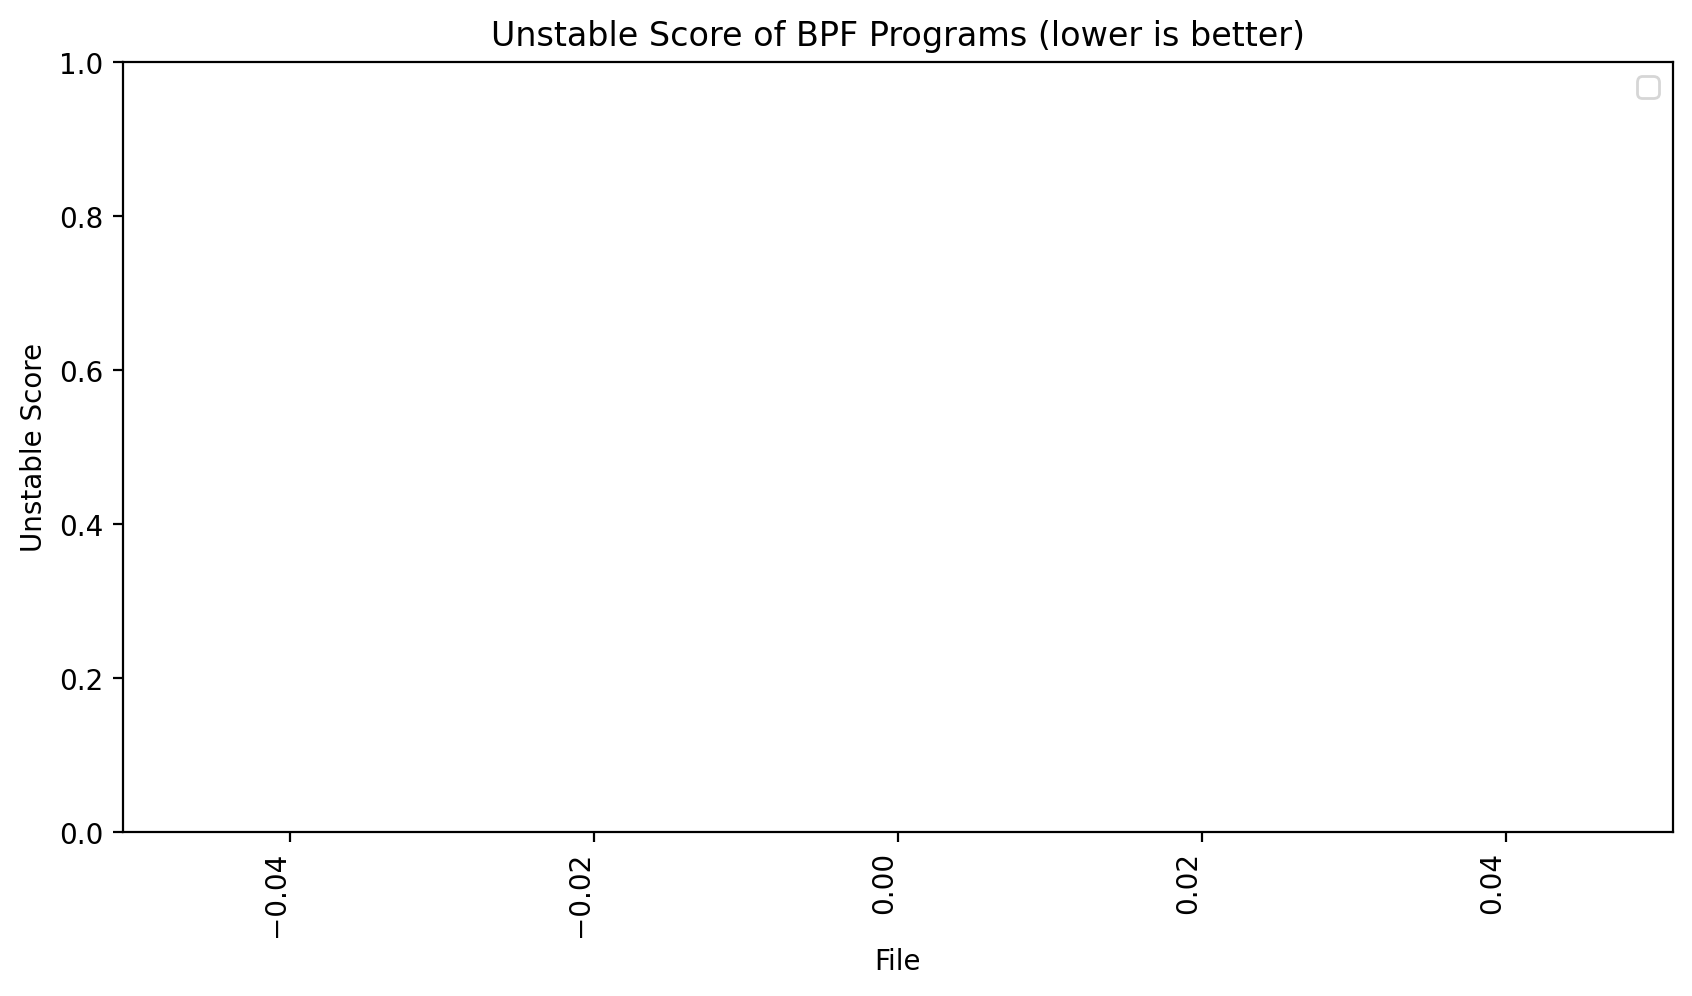

In [ ]:
import matplotlib.pyplot as plt
from depsurf import Category

fig, ax = plt.subplots(figsize=(10, 5), dpi=200)

# remove margin for the bar plot
plt.margins(x=0.01)

curr_x = 0
for category, cat_df in df.groupby("category"):
    color = Category(category).color
    ax.bar(cat_df.name, cat_df["score"], color=color, label=category)
    xlen = len(cat_df) / len(df)
    ax.axhline(
        cat_df["score"].mean(),
        linestyle="--",
        xmin=curr_x,
        xmax=curr_x + xlen,
        color="black",
        linewidth=1,
    )
    curr_x += xlen


handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys())

for label in ax.get_xticklabels():
    label.set_rotation(90)
    label.set_horizontalalignment("right")

ax.set_ylabel("Unstable Score")
ax.set_xlabel("File")
ax.set_title("Unstable Score of BPF Programs (lower is better)")